# IrIS dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score

import pickle
import json

In [2]:
df=load_iris()
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df1=pd.DataFrame(df.data ,columns=df.feature_names)
df1["species"]=df.target

In [4]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df1["species"].replace({0:"setosa",1:"versicolor",2:"virginica"},inplace=True)

In [8]:
df1["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
df1.shape

(150, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [12]:
x=df1.drop("species",axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y=df1["species"]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20 ,random_state=45)

In [15]:
x_train,y_train

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 76                 6.8               2.8                4.8               1.4
 96                 5.7               2.9                4.2               1.3
 119                6.0               2.2                5.0               1.5
 101                5.8               2.7                5.1               1.9
 25                 5.0               3.0                1.6               0.2
 ..                 ...               ...                ...               ...
 68                 6.2               2.2                4.5               1.5
 95                 5.7               3.0                4.2               1.2
 32                 5.2               4.1                1.5               0.1
 124                6.7               3.3                5.7               2.1
 131                7.9               3.8                6.4               2.0
 
 [120 rows x 4 columns],
 76     versicolor
 96   

In [16]:
x_test,y_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 43                 5.0               3.5                1.6               0.6
 129                7.2               3.0                5.8               1.6
 3                  4.6               3.1                1.5               0.2
 34                 4.9               3.1                1.5               0.2
 44                 5.1               3.8                1.9               0.4
 38                 4.4               3.0                1.3               0.2
 105                7.6               3.0                6.6               2.1
 123                6.3               2.7                4.9               1.8
 140                6.7               3.1                5.6               2.4
 28                 5.2               3.4                1.4               0.2
 125                7.2               3.2           

# train the model

In [17]:
lr_model=LogisticRegression(multi_class='ovr',solver='liblinear')
lr_model.fit(x_train ,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [18]:
# evaluvation
y_pred=lr_model.predict(x_test)
print("y_pred",y_pred)
y_pred[20:25]

y_pred ['setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor']


array(['virginica', 'virginica', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [19]:
y_test[20:25]

84     versicolor
85     versicolor
115     virginica
51     versicolor
4          setosa
Name: species, dtype: object

In [20]:
#testing accuracy
confusion_matrix(y_test ,y_pred)
print("Confusion_matrix==>>:\n",confusion_matrix(y_test ,y_pred))
classification_report(y_test,y_pred)
print("classification report==>>",classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)
print("accurancy==>>",accuracy_score(y_test,y_pred))

Confusion_matrix==>>:
 [[11  0  0]
 [ 0  5  2]
 [ 0  2 10]]
classification report==>>               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.71      0.71      0.71         7
   virginica       0.83      0.83      0.83        12

    accuracy                           0.87        30
   macro avg       0.85      0.85      0.85        30
weighted avg       0.87      0.87      0.87        30

accurancy==>> 0.8666666666666667


In [21]:
# train accuracy

y_pred=lr_model.predict(x_train)
y_pred[0:5]


array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [22]:
y_train[0:5]

76     versicolor
96     versicolor
119     virginica
101     virginica
25         setosa
Name: species, dtype: object

In [23]:
# training accuracy

In [24]:
confusion_matrix(y_train ,y_pred)
print("Confusion_matrix==>>:\n",confusion_matrix(y_train ,y_pred))
classification_report(y_train,y_pred)
print("classification report==>>",classification_report(y_train,y_pred))
accuracy_score(y_train,y_pred)
print("accurancy==>>",accuracy_score(y_train,y_pred))

Confusion_matrix==>>:
 [[39  0  0]
 [ 0 40  3]
 [ 0  1 37]]
classification report==>>               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       0.98      0.93      0.95        43
   virginica       0.93      0.97      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

accurancy==>> 0.9666666666666667


f:\.anacoda project\python3.9\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[11,  0,  0],
       [ 0,  5,  2],
       [ 0,  2, 10]], dtype=int64)

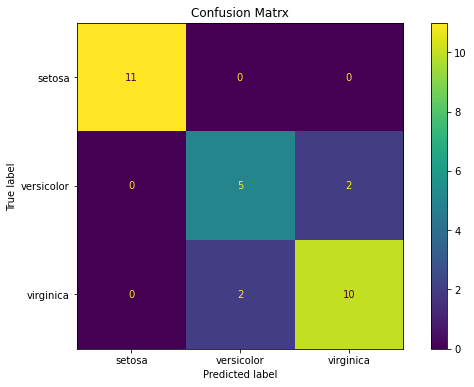

In [25]:

#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =plot_confusion_matrix(lr_model, x_test, y_test, display_labels= df.target_names, ax = ax)
disp.confusion_matrix

In [26]:
import pickle

with open("Lr_model.pkl","wb") as f:
    pickle.dump(lr_model ,f)

In [27]:
df.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
target_names={"setosa":0,"versicolor":1,"virginica":2}
target_names["setosa"]

0

In [29]:
import json

with open ("target_names.json","w") as f:
    json.dump("target_names",f)

In [30]:
df1.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [31]:
df1.head(1).T

,0
sepal length (cm),5.1
sepal width (cm),3.5
petal length (cm),1.4
petal width (cm),0.2
species,setosa


In [32]:
sepal_length = 60
sepal_width = 100
petal_length = 20
petal_width = 300


In [33]:
test_array=np.zeros([len(x.columns)])
test_array

array([0., 0., 0., 0.])

In [34]:
test_array[0]

0.0

In [35]:
test_array[0]=sepal_length
test_array[1]=sepal_width
test_array[2]=petal_length
test_array[3]=petal_width 

In [36]:
test_array

array([ 60., 100.,  20., 300.])

In [37]:
lr_model.predict([test_array])[0]

f:\.anacoda project\python3.9\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'virginica'